<hr></hr>
<div style="text-align: center">
    <h1 style="font-family: Georgia; font-size: 20px;">PART I. LINEAR REGRESSION (REGMODL):</p>
        <h2 style="font-family: Georgia; font-size: 18px;">JOAQUIN MOLTO (PID: 6119985)</p>
</div>
<hr></hr>

In [1]:
# IMPORT STATEMENTS
import sklearn as sk
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('C:/Users/jmolt/.matplotlib/stylelib/rose-pine.mplstyle')

In [2]:
XtrainDF = pd.read_csv('TR.csv')
XvalDF = pd.read_csv('TT.csv')
XtstDF = pd.read_csv('TS.csv')

y_trainDF = pd.read_csv('TR_TARGET.csv')
y_valDF = pd.read_csv('TT_TARGET.csv')
y_tstDF = pd.read_csv('TS_TARGET.csv')

In [3]:
Xtrain = XtrainDF.to_numpy()
Xval = XvalDF.to_numpy()
Xtst = XtstDF.to_numpy()

y_train = y_trainDF.to_numpy()
y_val = y_valDF.to_numpy()
y_tst = y_tstDF.to_numpy()

In [4]:
Xtrain.shape, Xval.shape, Xtst.shape, y_train.shape, y_val.shape, y_tst.shape

((4872, 12), (1615, 12), (10, 12), (4872, 1), (1615, 1), (10, 1))

In [5]:
print(Xtrain.shape[0],Xtrain.shape[1])

4872 12


In [6]:
XtrainDF_STD = pd.read_csv('TR_STANDARDIZED.csv')
XvalDF_STD = pd.read_csv('TT_STANDARDIZED.csv')
XtstDF_STD = pd.read_csv('TS_STANDARDIZED.csv')

In [7]:
Xtrain_STD = XtrainDF_STD.to_numpy()
Xval_STD = XvalDF_STD.to_numpy()
Xtst_STD = XtstDF_STD.to_numpy()

In [8]:
Xtrain_STD.shape, Xval_STD.shape, Xtst_STD.shape, y_train.shape, y_val.shape, y_tst.shape

((4872, 12), (1615, 12), (10, 12), (4872, 1), (1615, 1), (10, 1))

In [9]:
print(Xtrain_STD.shape[0],Xtrain_STD.shape[1])

4872 12


***REGMODL01***

In [10]:
# DEFINE MODEL ARCHITECTURE
regmodl01 = Sequential([
    Dense(8, activation='relu', input_shape=(Xtrain.shape[1],)),
    Dense(1)
])

In [11]:
# COMPILE THE MODEL
regmodl01.compile(
    optimizer=RMSprop(), 
    loss="mean_absolute_error", 
    metrics=['mae'])

In [ ]:
# TRAIN THE MODEL
history = regmodl01.fit(
    Xtrain,
    y_train,
    epochs = 100,
    validation_data=(Xval,y_val)
)

In [13]:
# EXTRACT HISTORY FOR LOSS AND MAE ON THE TRAINING AND VALIDATION SET
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

# REPORT THE FINAL LOSS AND MAE ON THE TRAINING AND VALIDATION SET
final_loss_train = loss[-1]
final_mae_train = mae[-1]
final_loss_val = val_loss[-1]
final_mae_val = val_mae[-1]

In [14]:
print(f'Final Loss (Training): {final_loss_train}, Final MAE (Training): {final_mae_train}')
print(f'Final Loss (Validation): {final_loss_val}, Final MAE (Validation): {final_mae_val}')

Final Loss (Training): 0.6168303489685059, Final MAE (Training): 0.6168303489685059
Final Loss (Validation): 0.5848075151443481, Final MAE (Validation): 0.5848075151443481


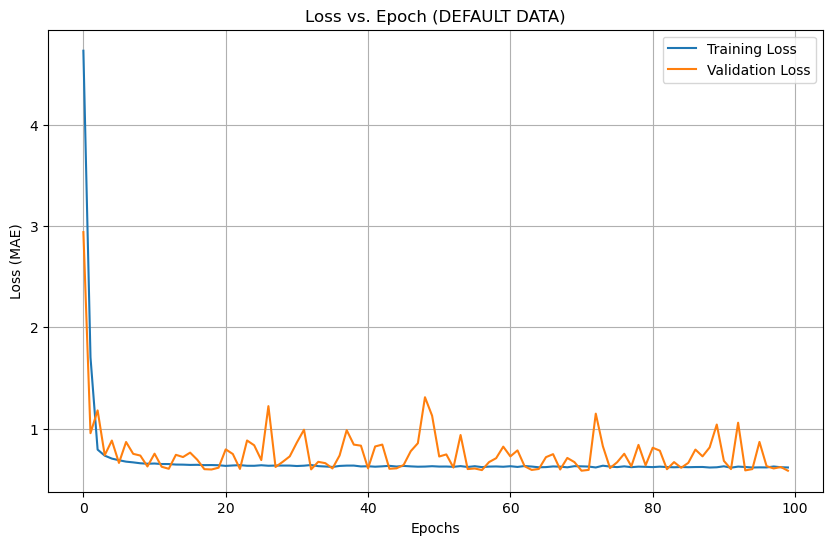

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss vs. Epoch (DEFAULT DATA)')
plt.xlabel('Epochs')
plt.ylabel('Loss (MAE)')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# COMPILE THE MODEL
regmodl01.compile(
    optimizer=RMSprop(), 
    loss="mean_absolute_error", 
    metrics=['mae'])

In [ ]:
# TRAIN THE MODEL
history = regmodl01.fit(
    Xtrain_STD,
    y_train,
    epochs = 100,
    validation_data=(Xval_STD,y_val)
)

In [18]:
# EXTRACT HISTORY FOR LOSS AND MAE ON THE TRAINING AND VALIDATION SET
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

# REPORT THE FINAL LOSS AND MAE ON THE TRAINING AND VALIDATION SET
final_loss_train = loss[-1]
final_mae_train = mae[-1]
final_loss_val = val_loss[-1]
final_mae_val = val_mae[-1]

In [19]:
print(f'Final Loss (Training): {final_loss_train}, Final MAE (Training): {final_mae_train}')
print(f'Final Loss (Validation): {final_loss_val}, Final MAE (Validation): {final_mae_val}')

Final Loss (Training): 0.5365544557571411, Final MAE (Training): 0.5365544557571411
Final Loss (Validation): 0.5591254830360413, Final MAE (Validation): 0.5591254830360413


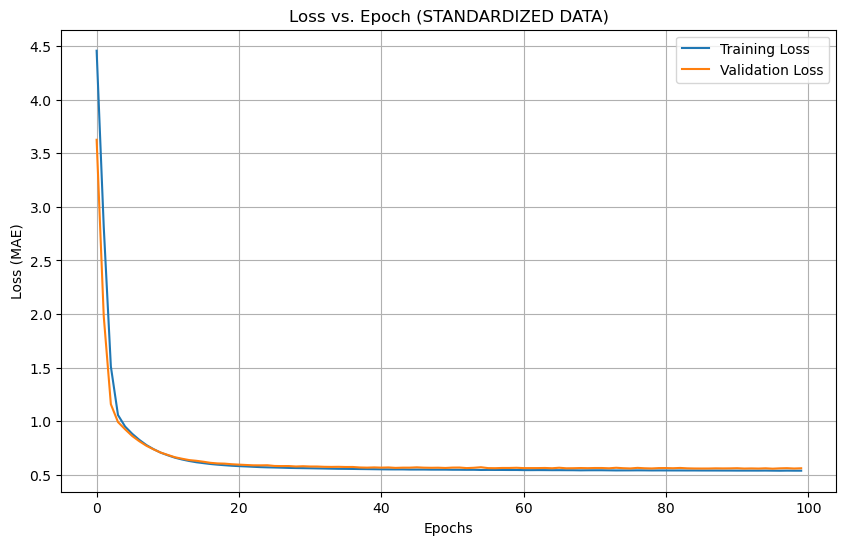

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss vs. Epoch (STANDARDIZED DATA)')
plt.xlabel('Epochs')
plt.ylabel('Loss (MAE)')
plt.legend()
plt.grid(True)
plt.show()

***REGMODL02***

In [21]:
# DEFINE MODEL ARCHITECTURE
regmodl02 = Sequential([
    Dense(64, activation='relu', input_shape=(Xtrain.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

In [22]:
# COMPILE THE MODEL
regmodl02.compile(
    optimizer=RMSprop(), 
    loss="mean_absolute_error", 
    metrics=['mae'])

In [ ]:
# TRAIN THE MODEL
history = regmodl02.fit(
    Xtrain,
    y_train,
    epochs = 250,
    validation_data=(Xval,y_val)
)

In [24]:
# EXTRACT HISTORY FOR LOSS AND MAE ON THE TRAINING AND VALIDATION SET
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

# REPORT THE FINAL LOSS AND MAE ON THE TRAINING AND VALIDATION SET
final_loss_train = loss[-1]
final_mae_train = mae[-1]
final_loss_val = val_loss[-1]
final_mae_val = val_mae[-1]

In [25]:
print(f'Final Loss (Training): {final_loss_train}, Final MAE (Training): {final_mae_train}')
print(f'Final Loss (Validation): {final_loss_val}, Final MAE (Validation): {final_mae_val}')

Final Loss (Training): 0.5465433597564697, Final MAE (Training): 0.5465433597564697
Final Loss (Validation): 0.5606126189231873, Final MAE (Validation): 0.5606126189231873


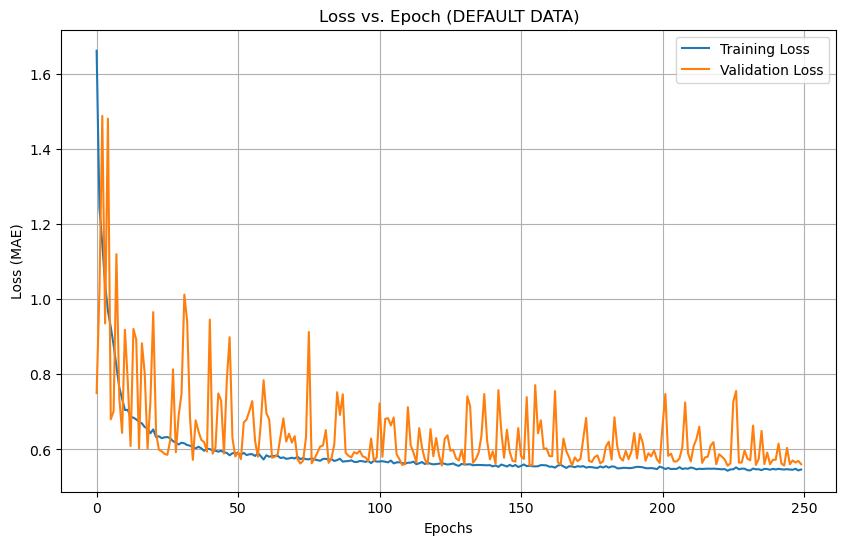

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss vs. Epoch (DEFAULT DATA)')
plt.xlabel('Epochs')
plt.ylabel('Loss (MAE)')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# COMPILE THE MODEL
regmodl02.compile(
    optimizer=RMSprop(), 
    loss="mean_absolute_error", 
    metrics=['mae'])

In [ ]:
# TRAIN THE MODEL
history = regmodl02.fit(
    Xtrain_STD,
    y_train,
    epochs = 250,
    validation_data=(Xval_STD,y_val)
)

In [29]:
# EXTRACT HISTORY FOR LOSS AND MAE ON THE TRAINING AND VALIDATION SET
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

# REPORT THE FINAL LOSS AND MAE ON THE TRAINING AND VALIDATION SET
final_loss_train = loss[-1]
final_mae_train = mae[-1]
final_loss_val = val_loss[-1]
final_mae_val = val_mae[-1]

In [30]:
print(f'Final Loss (Training): {final_loss_train}, Final MAE (Training): {final_mae_train}')
print(f'Final Loss (Validation): {final_loss_val}, Final MAE (Validation): {final_mae_val}')

Final Loss (Training): 0.3878785967826843, Final MAE (Training): 0.3878785967826843
Final Loss (Validation): 0.5619043111801147, Final MAE (Validation): 0.5619043111801147


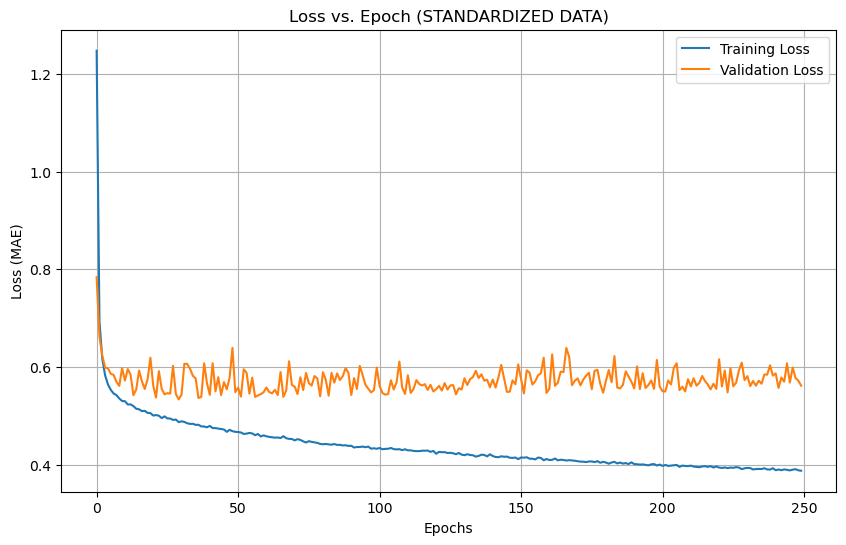

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss vs. Epoch (STANDARDIZED DATA)')
plt.xlabel('Epochs')
plt.ylabel('Loss (MAE)')
plt.legend()
plt.grid(True)
plt.show()

***REGMODL03***

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model_checkpoint_callback = ModelCheckpoint(
    filepath="regmodl03.keras",
    save_best_only=True,
    monitor='val_loss',
    mode='min'
)
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=500,
    verbose=1,
    restore_best_weights=True
)

In [33]:
# DEFINE MODEL ARCHITECTURE
regmodl02 = Sequential([
    Dense(32, activation='relu', input_shape=(Xtrain.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1)
])

In [34]:
# COMPILE THE MODEL
regmodl02.compile(
    optimizer=RMSprop(), 
    loss="mean_absolute_error", 
    metrics=['mae'])

In [ ]:
# TRAIN THE MODEL
history = regmodl02.fit(
    Xtrain_STD,
    y_train,
    epochs = 500,
    validation_data=(Xval_STD,y_val),
    callbacks=[model_checkpoint_callback,early_stopping_callback]
)

In [36]:
# EXTRACT HISTORY FOR LOSS AND MAE ON THE TRAINING AND VALIDATION SET
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

# REPORT THE FINAL LOSS AND MAE ON THE TRAINING AND VALIDATION SET
final_loss_train = loss[-1]
final_mae_train = mae[-1]
final_loss_val = val_loss[-1]
final_mae_val = val_mae[-1]

In [37]:
print(f'Final Loss (Training): {final_loss_train}, Final MAE (Training): {final_mae_train}')
print(f'Final Loss (Validation): {final_loss_val}, Final MAE (Validation): {final_mae_val}')

Final Loss (Training): 0.4420470595359802, Final MAE (Training): 0.4420470595359802
Final Loss (Validation): 0.5436646938323975, Final MAE (Validation): 0.5436646938323975


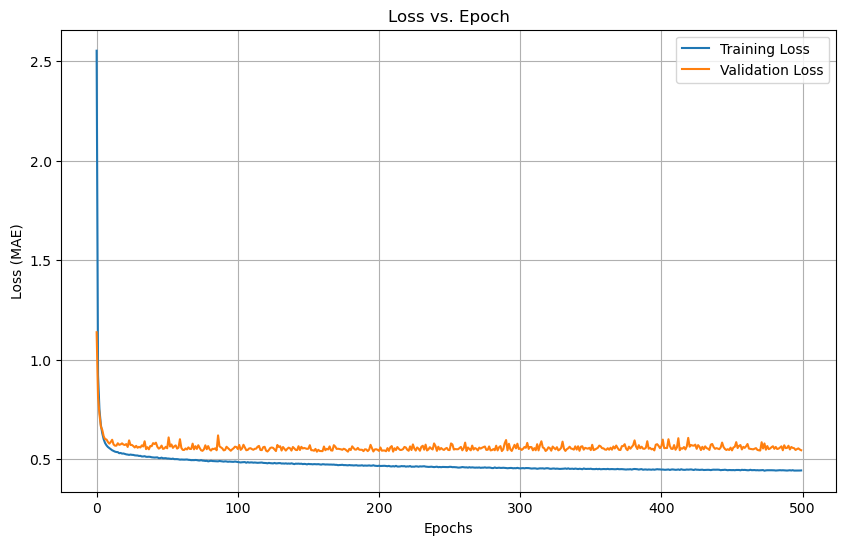

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss vs. Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss (MAE)')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
# Assuming 'val_mae' is being monitored
val_mae_history = history.history['val_mae']

# Find the epoch number with the lowest validation MAE
best_epoch = val_mae_history.index(min(val_mae_history)) + 1  # Adding 1 because epochs are 1-indexed in logs
best_val_mae = min(val_mae_history)

print(f"The lowest validation MAE was: {best_val_mae}") 
print(f"At epoch: {best_epoch}")

The lowest validation MAE was: 0.5363085269927979
At epoch: 157


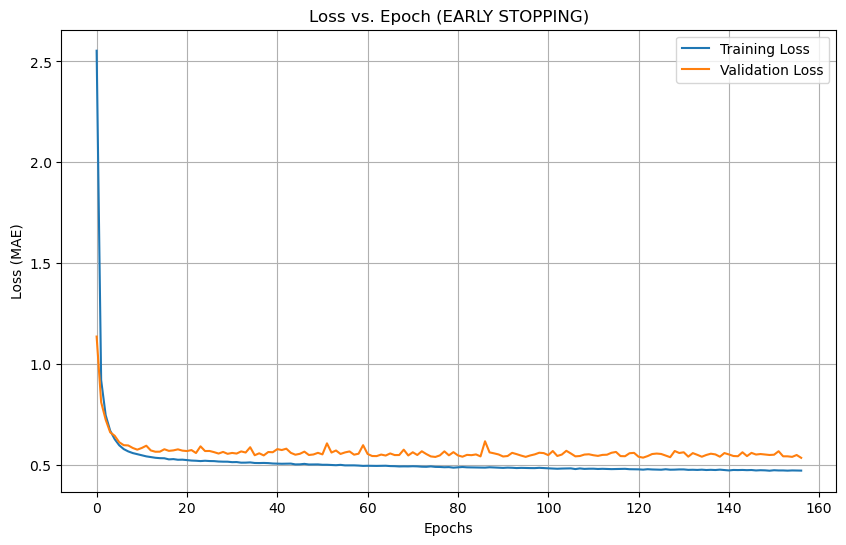

In [40]:
loss = history.history['loss'][:best_epoch]
val_loss = history.history['val_loss'][:best_epoch]

plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss vs. Epoch (EARLY STOPPING)')
plt.xlabel('Epochs')
plt.ylabel('Loss (MAE)')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
from tensorflow.keras.models import load_model

regmodl03 = load_model('regmodl03.keras')
y_pred = regmodl03.predict(Xtst_STD)

1/1 [==============================] - 0s 81ms/step


In [42]:
# Flatten y_pred if it's not already a 1D array
y_pred = y_pred.flatten()

# Iterate through all predictions and actual targets
for i in range(len(y_pred)):
    prediction = y_pred[i]
    actual = y_tst[i]
    error = abs(prediction - actual)  # calculate absolute error
    print(f"Prediction: {prediction}, Actual: {actual}, Error: {error}")

Prediction: 4.910268783569336, Actual: [5], Error: [0.08973122]
Prediction: 5.490330696105957, Actual: [5], Error: [0.4903307]
Prediction: 6.17636251449585, Actual: [7], Error: [0.82363749]
Prediction: 5.705898761749268, Actual: [6], Error: [0.29410124]
Prediction: 6.066133975982666, Actual: [5], Error: [1.06613398]
Prediction: 4.863868713378906, Actual: [5], Error: [0.13613129]
Prediction: 6.158533573150635, Actual: [6], Error: [0.15853357]
Prediction: 5.979498386383057, Actual: [6], Error: [0.02050161]
Prediction: 5.8286638259887695, Actual: [7], Error: [1.17133617]
Prediction: 6.198947906494141, Actual: [6], Error: [0.19894791]


++++  END OF THE REGRESSION MODEL PART ++++